In [22]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "./mouse_drug_data.csv"
clinical_trial_data_to_load = "./clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse = pd.read_csv(mouse_drug_data_to_load)
clinical = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
file = pd.merge(mouse, clinical, how = "outer", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
file.head()



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumoravg = file.groupby(["Drug", "Timepoint"]).mean()

# Convert to DataFrame
tumoravgdf = pd.DataFrame(tumoravg)

# Preview DataFrame
tumoravgdf.head()
# tumoravg.head()

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174

In [6]:
# # Create dataframe for each drug that includes timepoint and volume
ste_file = file[file["Drug"] == "Stelasyn"]
ste_file = ste_file.rename(columns = {"Tumor Volume (mm3)":"Ste Volume"})
ste_vol = ste_file[["Timepoint", "Ste Volume"]].groupby(["Timepoint"]).mean()
ste_sem = ste_file[["Timepoint", "Ste Volume"]].groupby(["Timepoint"]).sem()
ste_vol_means = ste_vol["Ste Volume"]
ste_sem
# cap_file = file[file["Drug"] == "Capomulin"]
# cap_vol = cap_file[["Timepoint", "Tumor Volume (mm3)"]].groupby(["Timepoint"]).mean()
# cap_vol = cap_vol.rename(columns = {"Tumor Volume (mm3)":"Cap Volume"})
# cap_vol_means = cap_vol["Cap Volume"]
# cap_sem = cap_vol_means.sem()

# # REPEAT FOR EACH DRUG
ste_sem

,Ste Volume
Timepoint,
0,0.000000
5,0.239862
10,0.433678
15,0.493261
20,0.621889
25,0.741922
30,0.899548
35,1.003186
40,1.410435


<ErrorbarContainer object of 3 artists>

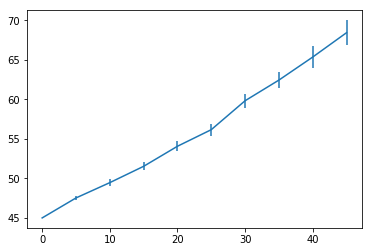

In [7]:
# Creating a scatter plot that shows how the tumor volume changes over time for each treatment.

# x-axis = list of timepoints
timepoints = file["Timepoint"].unique()
xaxis = np.arange(0, max(timepoints)+5, 5)

# y-axis = tumor volume for each drug
ste_yaxis = ste_vol_means
# cap_yaxis = cap_vol_means

fig, ax = plt.subplots()
# ax.errorbar(xaxis, cap_yaxis, yerr = cap_sem)
ax.errorbar(xaxis, ste_yaxis, yerr = ste_sem["Ste Volume"])

# plt.plot(xaxis, cap_yaxis)
# plt.plot(xaxis, ste_yaxis)

In [17]:
#Creating a scatter plot that shows how the number of metastatic (cancer spreading) sites changes over time for each treatment.
metsitedata = file[["Drug", "Timepoint", "Metastatic Sites"]]
metsitedatadf = pd.DataFrame(metsitedata.groupby(["Drug", "Timepoint"]).mean())

# Preview DataFrame
metsitedatadf.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [19]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metsite_sem = pd.DataFrame(metsitedata.groupby(["Drug", "Timepoint"]).sem())

# Preview DataFrame
metsite_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [25]:
timetable = pd.DataFrame(file["Timepoint"].unique())
timetable

,0
0,0
1,5
2,10
3,15
4,20
5,25
6,30
7,35
8,40
9,45
